<a href="https://colab.research.google.com/github/skyworld19/ds-school-advanced/blob/master/DL_01_02_Tensorflow_Keras_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML 1-2. Tensorflow & Keras 기초

In [ ]:
import tensorflow as tf

In [ ]:
# Tensorㅣ 상태가 없는 변경 불가 객체(Immutable stateless object) 
# 변경되지 않는 상수를 가지는 경우도 stateless object 라고 함
t1 = tf.convert_to_tensor([1,2,3,4,5], dtype=tf.int32)
type(t1)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
t1[1] = 10  # assignment 할수 없음
# TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [ ]:
# tf.Variable 객체는 assign(), assign_sub() 등과 같은 메서드를 사용해 값을 변경할 수 있는 텐서입니다.
# https://www.tensorflow.org/guide/variable?hl=ko
t2 = tf.Variable([1,2,3,4,5])
type(t2)

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [ ]:
t2[0] = 10   # assignment 할수 없음
# TypeError: 'ResourceVariable' object does not support item assignment

In [ ]:
# tensor변수는 assign() 등의 메서드를 통해서만 값을 변경해야 한다.
t2[0].assign(10)
t2

<tf.Variable 'Variable:0' shape=(5,) dtype=int32, numpy=array([10,  2,  3,  4,  5], dtype=int32)>

In [ ]:
# Tensor는 assign 메서드 없음 (변경 불가!)
t1[0].assign(10)

In [ ]:
t3 = tf.Variable(3)
print(type(t3), t3)
t3 = 5  # t3라는 이름이 정수 int 객체를 참조하게 된다.  tf.Variable 아님
print(type(t3), t3)

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>
<class 'int'> 5


## 0.Deep Learning Framework
- Deep Learning 구현을 할 수 있도록 도와주는 Software
- 종류 : TensorFlow, PyTorch, Keras, Caffe/Caffe2, Theano, MXNET, CNTK, ... 등
- **TensorFlow** 
  - Open source software library
  - Originally developed by Google Brain Team
  - Gmail, Google 포토, 음성 인식에서 사용되는 프레임워크
  - 무료, 신뢰성 및 구글의 지원
  - 딥러닝을 구현하기 훨씬 쉬워짐
  - Python, JavaScript, C++, Java, Go, C#, Haskell, Julia, MATLAB, Ruby, Rust, Scala programming languages을 사용하여 TensorFlow 코드 작성 가능
  - 개발자를 위한 광범위한 문서


## 1.Tensorflow Basic - Tensorflow API
- https://www.tensorflow.org/api_docs/python/tf?hl=ko
- https://www.tensorflow.org/api_docs/python/tf/all_symbols
- Tensorflow 2.4 (한국어) : https://runebook.dev/ko/docs/tensorflow/

In [ ]:
import tensorflow as tf
tf.__version__

'2.6.0'

### 1-01. Tensor Object
- tf.Tensor
  - shape
  - dtype
  - name
  - device : tensor가 생성될 장치 이름
  - op : tensor를 출력으로 생성하는 tf.Operation, Error in eagar mode
  - graph : tenser를 포함하는 tf.Graph, Error in eagar mode
  - eval(feed_dict, session) : 노드를 평가(실행), Error in eagar mode
- 다차원 배열
- Tensorflow 모든 연산은 자동으로 Python Native Type을 Tensor로 변환
  - 명시적 변환 : tf.convert_to_tensor(value, dtype, dtype_hit, name)

In [ ]:
import tensorflow as tf

t1 = tf.convert_to_tensor(1)
t2 = tf.convert_to_tensor(2)

ret1 = tf.add(t1, t2)
display(t1, t2, ret1)
display(ret1.shape, ret1.dtype)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

<tf.Tensor: shape=(), dtype=int32, numpy=2>

<tf.Tensor: shape=(), dtype=int32, numpy=3>

TensorShape([])

tf.int32

In [ ]:
# Tensorflow 모든 연산은 자동으로 Python Native Type을 Tensor로 변환
ret2 = tf.add(1, 2)
display(ret2.shape, ret2.dtype)

TensorShape([])

tf.int32

In [ ]:
[[1, 2], [3, 4]]
[[1, 1], [1, 1]]
[[2, 3], [4, 5]]

In [ ]:
# broadcasting
# [[1, 1], [1, 1]]  # broadcasting되어 element-wise 동작이 될 수 있음
# [[1, 2], [3, 4]]
ret2 = tf.add([[1, 2], [3, 4]], 1)
print(ret2)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [ ]:
# Tensor와 numpy의 차이점, Tensor는 값 변경을 할 수 없다
ret2[0][0] = 100

In [ ]:
display(ret1, ret2)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [4, 5]], dtype=int32)>

In [ ]:
# broadcasting
# [[3, 3], [3, 3]]  # broadcasting되어 element-wise 동작이 될 수 있음
# [[2, 3], [4, 5]]
print(ret1 * ret2)

tf.Tensor(
[[ 6  9]
 [12 15]], shape=(2, 2), dtype=int32)


In [ ]:
# 형변환
t3 = tf.convert_to_tensor(range(1, 10, 2), tf.float32)
t4 = tf.cast(t3, tf.int32)
display(t3, t4)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 3., 5., 7., 9.], dtype=float32)>

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9], dtype=int32)>

In [ ]:
# 형변환
t5 = tf.convert_to_tensor([1.8, 2.2])
print(t5)
t6 = tf.cast(t5, tf.int32)
print(t6)

tf.Tensor([1.8 2.2], shape=(2,), dtype=float32)
tf.Tensor([1 2], shape=(2,), dtype=int32)


In [ ]:
# Numpy 호환성
import numpy as np
t7 = tf.convert_to_tensor(np.array([1, 2, 3, 4]))
t8 = tf.convert_to_tensor(np.array([2, 3, 4, 5]))
res = tf.add(t7, t8)  # 덧셈
display(t7, t8, res)
print(type(res), res.shape, res.dtype)
print(np.array(res), res.numpy())
arr = np.add(res, 1)
print(type(arr), arr)

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 2, 3, 4])>

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([2, 3, 4, 5])>

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 7, 9])>

<class 'tensorflow.python.framework.ops.EagerTensor'> (4,) <dtype: 'int64'>
[3 5 7 9] [3 5 7 9]
<class 'numpy.ndarray'> [ 4  6  8 10]


In [ ]:
import pandas as pd
df = pd.DataFrame({'a':[1,3,4], 'b':[2, 3, 4]})
df

,a,b
0,1,2
1,3,3
2,4,4


In [ ]:
b = df.values
display(type(b), b)

numpy.ndarray

array([[1, 2],
       [3, 3],
       [4, 4]])

In [ ]:
df['a'].values

array([1, 3, 4])

In [ ]:
c = df['a'].to_numpy()
type(c), c

(numpy.ndarray, array([1, 3, 4]))

### 1-02. Constant
- 변경되지 않는 상수 값을 갖는 Tensor를 생성하는 함수
- tf.constant(value, dtype, shape, name)
  - value : Tensor가 갖는 값
  - dtype = None : 데이터 타입
  - shape = None : Tensor의 차원별 element 개수
  - name = 'Const' : constant의 이름
- Tensor 변환 함수를 갖는 모든 객체에 사용 가능
- tf.convert_to_tensor()는 shape를 지정할 수 없지만 tf.constant는 shape 지정가능


In [ ]:
# convert_to_tensor - shape 지정 불가능
c = tf.convert_to_tensor(1)
display(type(c), c)

tensorflow.python.framework.ops.EagerTensor

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
# constant - shape 지정 가능하지만 지정하지 않은 경우
c = tf.constant(1)
display(type(c), c)

tensorflow.python.framework.ops.EagerTensor

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
# constant - shape 지정한 경우
d = tf.constant(2, shape=(3,))
display(type(d), d)

tensorflow.python.framework.ops.EagerTensor

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 2, 2], dtype=int32)>

In [ ]:
# TypeError: 'tensorflow.python.framework.ops.EagerTensor' object 
# does not support item assignment
d[0] = 100

### 1-03.  TensorFlow 연산, 축약 연산자
- tf.add(a, b) : a + b
- tf.subtract(a, b) : a - b
- tf.multiply(a, b) : a * b
- tf.divide(a, b) : a / b
- tf.pow(a, b) : a ** b
- tf.mod() : a % b
- tf.greater_equal() : a >= b
- tf.greater() : a > b
- tf.less_equal() : a <= b
- tf.less() : a < b
- tf.logical_and(a, b) : a & b
- tf.logical_or(a, b) : a | b
- tf.logical_not(a) : ~a
- tf.abs(a) : abs(a)
- tf.negative(a) : -a

### 1-04. Variable
- Tensor는 상태가 없고 변경 불가 객체(Immutable stateless object)
- 훈련을 통해 변경될 값(weight, bias) 필요
- 값 변경을 위한 API 필요
- tf.Variable(초기값)
   - assign(새로운값)
- 연산 후 할당 함수
   - tf.assign_add(), tf.assign_sub()
- GradientTape에 의해 자동 추적

In [ ]:
import tensorflow as tf

v = tf.Variable(1, dtype=tf.float32, name='x')
print(v)

v.assign(2)
print(v)

v.assign(tf.square(v))
print(v)
print(v.numpy())

# 연산후 할당함수
print(v.assign_add(3))     # v = v + 3
print(v.assign_sub(0.1))   # v = v - 0.1

<tf.Variable 'x:0' shape=() dtype=float32, numpy=1.0>
<tf.Variable 'x:0' shape=() dtype=float32, numpy=2.0>
<tf.Variable 'x:0' shape=() dtype=float32, numpy=4.0>
4.0
<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=7.0>
<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=6.9>


### 1-05. 난수 생성
- 균등 분포(uniform distribution)
  - tf.random.uniform(shape, minval=0, maxval=None) : 0 <= x < 1
- 정규 분포(normal distribution)
  - tf.random.normal(shape, mean=0.0, stddev=1.0) : 정규 분포
  - tf.random.truncated_normal(shape, mean=0.0, stddev=1.0) : 절단 정규 분표 (표준편차 2이상 절단)
  - shape : 생성하려는 난수의 개수와 형태
  - mean : 평균, std : 표준편차

In [ ]:
x = tf.Variable(tf.random.normal([3, 3]), name='x')
y = tf.Variable(tf.random.uniform([3, 3]), name='y')
z = tf.Variable(tf.random.truncated_normal([3, 3]))
print(f'x : {x}')
print(f'y : {y}')
print(f'z : {z}')

x : <tf.Variable 'x:0' shape=(3, 3) dtype=float32, numpy=
array([[-0.9573784 , -0.06427664, -1.387129  ],
       [-0.7860296 , -1.162419  ,  2.4263391 ],
       [ 0.46253014,  0.8814598 , -1.6338314 ]], dtype=float32)>
y : <tf.Variable 'y:0' shape=(3, 3) dtype=float32, numpy=
array([[0.77893615, 0.5054902 , 0.17084289],
       [0.32193744, 0.15998924, 0.74467397],
       [0.5396391 , 0.65021443, 0.80827487]], dtype=float32)>
z : <tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[-0.761784  , -0.0964819 , -0.6823503 ],
       [-0.42943835, -0.76528347,  0.59038717],
       [ 0.13011226,  1.0797644 , -0.23772146]], dtype=float32)>


### 1-06. 자동 미분
- 컨텍스트 내의 모든 정방향(forward-pass) 연산을 Tape에 기록
- 역방향 자동 미분 연산(reverse mode differentiantion) 후 폐기
- **tf.GradientTape([persistent=True])**
  - gradient()  : 1회용 사용
  - persistent=True : 동일한 연산에 대해 여러 미분을 계산
- 컨텍스트 내의 중간 값도 미분 가능
- 연산내 추적
  - Variable은 자동 추적
  - constant는 tape.watch(const) 필요


In [ ]:
# 자동 미분

x = tf.Variable(3.0)
#x = tf.constant(3.0)

with tf.GradientTape(persistent=True) as tape:
    #tape.watch(x)
    y = x ** 2 # 미분하면 : 2 * x
    z = 2 * y  # 2 * x**2 => 4 * x
    display(x, y, z)

dy_dx = tape.gradient(y, x) 
dz_dx = tape.gradient(z, x) 
display(dy_dx, dz_dx)
del tape

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

### 1-07. 그외 함수




#### 1-07-1. tf.cast
- tf.cast(x, dtype)
    - x의 dtype을 변경
    - x에 조건을 주어 x > 0.5 와 같이 특정 상황에서 변경하도록 할 수 있음
    - 조건을 줄 경우 True인 경우 1, False 인 경우 0을 의미하는 dtype의 숫자가 반환됨

In [ ]:
import tensorflow as tf
import numpy as np

x = tf.Variable(np.array([0.9, 0.5, 0.7, 0.3, 0.8]))
y = tf.cast(x, dtype=tf.int32)
z = tf.cast(x > 0.5, dtype=tf.int32)
print(y.numpy(), z.numpy())

[0 0 0 0 0] [1 0 1 0 1]


#### 1-07-2. tf.sigmoid
- tf.sigmoid(x)
  - x에 대한 sigmoid 함수 적용 값 구함


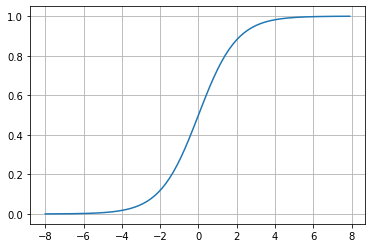

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(-8, 8, 0.1)
y = tf.sigmoid(x)
plt.plot(x, y)
plt.grid()
plt.show()

#### 1-07-3. tf.reduce_mean, tf.reduce_sum
- tf.reduce_mean(x)
   - x에 대한 평균을 구함
   - np.mean(x)과 동일함
- tf.reduce_sum(x)
   - x에 대한 합을 구함
   - np.sum(x)와 동일함

In [ ]:
# reduce_mean, reduce_sum : multi-threaded, GPU 사용
# np.mean, np.sum : single CPU에서 연산

In [ ]:
import numpy as np

x1 = tf.Variable(np.array([0.9, 0.5, 0.7, 0.3, 0.8]))
y = np.mean(x1.numpy())
z = tf.reduce_mean(x1).numpy()
print(f'y = {y:.6f}, z = {z:.6f}')

y = 0.640000, z = 0.640000


In [ ]:
x2 = tf.Variable(np.array([[0.9, 0.5, 0.7], [0.3, 0.8, 0.2]]))
y = np.mean(x2.numpy())
z = tf.reduce_mean(x2).numpy()
print(f'y = {y:.6f}, z = {z:.6f}')

y = 0.566667, z = 0.566667


#### 1-07-4. tf.squeeze
- tf.squeeze(tensor, axis=None, name=None)
    - 불필요 축 제거
    - axis를 지정하지 않으면 길이가 1 인 shape을 제거
    - axis를 지정하면 해당 축을 제거함 (목록으로 지정 가능)
    - https://www.tensorflow.org/api_docs/python/tf/squeeze  


In [ ]:
# t.shape은 Tensor의 shape을 확인할 수 있으며  shape=(2,) 는 2차원을 의미함
import tensorflow as tf
import numpy as np
t = tf.convert_to_tensor(np.arange(20).reshape(1, 4, 5, 1), dtype=tf.int32)
tf.shape(tf.squeeze(t))  # [4, 5]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 5], dtype=int32)>

In [ ]:
t = tf.convert_to_tensor(np.arange(20).reshape(1, 4, 1, 5, 1, 1), dtype=tf.int32)
tf.shape(tf.squeeze(t, [2, 4]))  

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 4, 5, 1], dtype=int32)>

#### 1-07-5. tf.reshape
- tf.reshape(tensor, shape, name=None)
  - shape을 변경함
  - shape에 새로운 shape을 지정하며, 1개의 -1을 포함할 수 있음
  - shape에 -1를 입력하면 고정된 차원은 우선 채우고 남은 부분을 알아서 채움
- https://www.tensorflow.org/api_docs/python/tf/reshape

In [ ]:
# t.shape은 Tensor의 shape을 확인할 수 있으며  shape=(6,) 는 6차원을 의미함
t = tf.convert_to_tensor(np.arange(20), dtype=tf.int32)
tf.shape(tf.reshape(t, (1, 4, 1, -1, 1, 1)))

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 4, 1, 5, 1, 1], dtype=int32)>

In [ ]:
t = tf.convert_to_tensor(np.arange(20), dtype=tf.int32)
tf.shape(tf.reshape(t, (-1, 1)))

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([20,  1], dtype=int32)>

### 1-08. Neural Network Visualization
- TensorSpace : https://tensorspace.org/index.html

## 2.Keras Basic - Keras API
- https://www.tensorflow.org/api_docs/python/tf/keras?hl=ko

### 2-01. Optimizer
- tf.keras.optimizers.Optimizer(learning_rate)
  - base class, 직접 사용 불가
  - learning_rate : 0.1 ~ 0.0001
- SGD : 확률적 경사하강법(Stochostic Gradient Descent), 가장 기초적인 Optimizer, 조금씩 데이터를 검토한 뒤 자주 방향을 찾자  
- Adam : gradient, learning rate를 모두 고려해서 방향을 찾자
- Adagrad : (learning rate) 처음엔 빠르게 학습하고 나중엔 세밀하게 학습, parameter별 learning rate 최적화
- RMSprop : (learning rate) 세밀하게 학습하되, 상황을 보며 정도를 정함
- Adadelta : (learning rate) 세밀한 정보가 너무 작아져서 학습이 안되는 것을 막자, 차원 마다 적응적 learning_rate
- Adamax : Max norm을 기반으로 한 Adam의 변형
- Nadam : Nesterov 모멘텀 + Adam


In [ ]:
- Momentum : Gradient를 미분한 것에 관성 개념을 도입해 덜 비틀거리면서 찾도록 하는 기법

In [ ]:
# 사용예
opt = tf.keras.optimizers.Adam(0.1)

### 2-02. Layer
- Layer Neural Network의 '하나의 Layer를 추상화'
- tf.keras.layers.Layer(trainable, name, dtype, dynamc)
   - 기반 클래스로 직접 사용은 불가능
- tf.keras.layers.Dense(units, activation, use_bias, kernel_initializer, bias_initilizer, ...)
   - 가장 일반적인 DNN의 완전 연결층
- tf.keras.layers.RNN, LSTM, GRU
   - 순환 네트워크, 시계열이나 시퀀스에 사용
- tf.keras.layers.Conv2D
   - 이미지 특징 추출 및 분류용
- tf.keras.layers.Dropout(rate, ...)
   - Dropout 용

### 2-03. Model, Sequential
- https://www.tensorflow.org/guide/keras/sequential_model?hl=ko
- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers?hl=en
- https://www.tensorflow.org/api_docs/python/tf/keras/losses?hl=en
- tf.keras.Sequential(layers)
  - tf.keras.Model 상속
  - layers : **순서를 갖는 layer stack 생성**
  - **add(layer) : 계층 추가**
  - **complie(optimizer, loss, metrics, ...)** : 훈련을 위한 모델 설정
    - optimizer : tf.keras.optimizers 내의 객체 또는 이름(str)
    - loss : tf.keras.losses 내의 객체 또는 이름(str) 
    - metics : 훈련과 테스트 과정에서 평가에 사용할 객체
  - **summary()** : Network의 Layer와 parameter 개수 출력
  - history = **fit(x, y, batch_size, epochs, verbose, callbacks, validation_split, validation_data, ...)** : 모델 학습
     - history : 학습 동안의 loss 등의 메트릭 기록 (dictionary, 기록 항목 별)
  - **predit(x, ...)** : 예측 결과 반환     
  - **evaluate(x, y, ...)** : 테스트 결과 반환
  - save(filepath, ...) : 모델 파일 저장
  - trainable_variables : 학습할 변수 목록
- tf.keras.models.load_model(filepath) : 모델 복원

In [ ]:
import tensorflow as tf

activations = [k for k,v in tf.keras.activations.__dict__.items() if callable(v)]
losses = [ k for k,v in tf.keras.losses.__dict__.items() if callable(v) ]
optimizers = [k for k,v in tf.keras.optimizers.__dict__.items() if callable(v)]
metrics = [k for k,v in tf.keras.metrics.__dict__.items() if callable(v)]
print('activations', activations)
print('losses', losses)
print('optimizers', optimizers)
print('metrics', metrics)

activations ['deserialize', 'elu', 'exponential', 'gelu', 'get', 'hard_sigmoid', 'linear', 'relu', 'selu', 'serialize', 'sigmoid', 'softmax', 'softplus', 'softsign', 'swish', 'tanh']
losses ['BinaryCrossentropy', 'CategoricalCrossentropy', 'CategoricalHinge', 'CosineSimilarity', 'Hinge', 'Huber', 'KLDivergence', 'LogCosh', 'Loss', 'MeanAbsoluteError', 'MeanAbsolutePercentageError', 'MeanSquaredError', 'MeanSquaredLogarithmicError', 'Poisson', 'SparseCategoricalCrossentropy', 'SquaredHinge', 'binary_crossentropy', 'categorical_crossentropy', 'categorical_hinge', 'cosine_similarity', 'deserialize', 'get', 'hinge', 'huber', 'kl_divergence', 'KLD', 'kld', 'kullback_leibler_divergence', 'log_cosh', 'logcosh', 'mean_absolute_error', 'MAE', 'mae', 'mean_absolute_percentage_error', 'MAPE', 'mape', 'mean_squared_error', 'MSE', 'mse', 'mean_squared_logarithmic_error', 'MSLE', 'msle', 'poisson', 'serialize', 'sparse_categorical_crossentropy', 'squared_hinge', 'Reduction']
optimizers ['Adadelta', 

### 2-04. Callback
- 매 batch 마다 호출할 함수 전달
  - model.fit(callbacks=[cb])
- tf.keras.callbacks.Callback
  - callback 생성을 위한 base class, 상속해서 구현
  - on_train_batch_begin() : 훈련 배치 시작
  - on_train_batch_end() : 훈련 배치 끝
  - on_test_batch_begin() : 테스트 배치 시작
  - on_test_batch_end() : 테스트 배치 끝
- 미리 구현된 Callback 클래스들
  - tf.keras.callbacks
     - EarlyStopping
     - TensorBoard
     - ModelCheckpoint
     

#### 2-04-1.  EarlyStopping Callback
- EarlyStopping(monitor, patience)
   - 관찰하는 값(metric)이 개선되지 않을 때 훈련 종료
   - 과적합 방지 기법
   - monitor : 관찰 대상 값 이름
   - min_delta : 개선 된 값으로 간주할 최소한의 변화 값
   - patience : 개선이 없으면 훈련을 종료할 epoch 횟수

### 2-05. Dropout
- Overfitting 방지 기법
- 학습하는 동안 무작위로 학습에서 노드 제외
- tf.keras.layers.Dropout(rate)
   - rate : 0.0 ~ 1.0,  (0.5 이하 추천)

   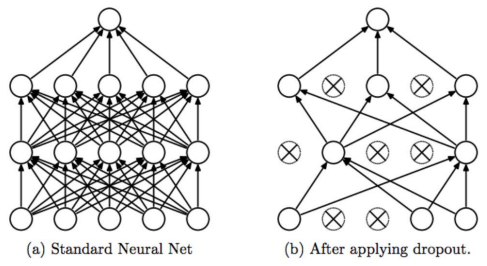

### 2-05. Convolution
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
- conv = tf.keras.layers.Conv2D(filters, kernel_size, strides, padding, ... activation, ... kernel_initializer, ... input_shape,...)
  - filters : 커널 개수
  - kernel_size : 정수 또는 튜플, 커널 크기
  - strides=(1,1) : 정수 또는 튜플, 커널 이동 간격, 2D
  - padding : 출력 보간 방법
     - Convolution 연산 후 생기는 외곽 영역 공백 채우기 기법
     - "SAME" : 출력 크기를 입력 크기와 같게되도록 채우기
     - "VALID" : 보간 없음
  - activation : 활성화 함수
  - kernel_initializer : 커널 생성 
     - shape of kernel : (height, width, in_channel, out_channel) 
  - input_shape : 입력 shape (height, width, channel)
- conved = conv(input) 
1. input : 입력 tensor
  - shape of input : (batch, height, width, channel)
  - shape : (N, H, W, C)
     - N : number of images(samples)
     - H : Height of the image
     - W : Width of the image
     - C : Channel(Color) count of the image
  - shape length : 1, 2, 4
     - 1 : (n) : (1, n, n, 1)
     - 2 : (n, m) : (1, n, m, 1)
     - 4 : (n, h, w, c)  
2. conved : convolution의 결과 tensor
  - shape of conved : (batch, height, width, filters)
  - shape : (N, H, W, F)
     - N : number of images(samples)
     - H : Height of the image
     - W : Width of the image
     - F : Filter count      

### 2-06. MaxPooling
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
- mp = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides, padding, ...)
  - pool_size=(2,2) : window size => 2D
  - strides : 이동 간격
  - padding : {"VALID", "SAME"}
- pooled = mp(input)  
1. input : 입력 tensor
  - shape of input : (batch, height, width, channel)
  - shape : (N, H, W, C)
     - N : number of images(samples)
     - H : Height of the image
     - W : Width of the image
     - C : Channel(Color) count of the image
  - shape length : 1, 2, 4
     - 1 : (n) : (1, n, n, 1)
     - 2 : (n, m) : (1, n, m, 1)
     - 4 : (n, h, w, c)  
2. pooled : pooling 결과 tensor
  - shape of pooled : (batch, height, width, channel)
  - shape : (N, H, W, C)
     - N : number of images(samples)
     - H : Height of the image after pooling
     - W : Width of the image after pooling
     - C : Channel(Color) count of the image


In [ ]:
# tf.keras.layers.AveragePooling2D

### 2-07. Flatten
- tf.keras.layers.Flatten
  - 입력을 1차원으로 만들어서 출력 (배치 크기 무관)

### 2-08. Dense
- 완전연결 계층
- tf.keras.layers.Dense(units, activation, use_bias, kernel_initializer, ...)
    - **units : 출력 값의 크기** (output 개수), 필수, 출력 shape, 샘플 축 생략
    - **activation : 활성화 함수**
     - linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력. Ex) 선형 회귀
     - sigmoid : 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
     - softmax : 소프트맥스 함수. 셋 이상을 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
     - relu : 렐루 함수. 은닉층에 주로 사용되는 활성화 함수
    - use_bias : 편향(b)을 사용할지 여부
    - kernel_initializer : 가중치(W) 초기화 함수
    - bias_iniotializer : 편향 초기화 함수
    - kernel_regularizer : 가중치 정규화 방법
    - bias_regularizer : 편향 정규화 방법
    - activity_regularizer : 출력 값 정규화 방법
    - kernel_constraint : 가중치에 적용되는 부가적인 제약 함수
    - bias_constraint : 편향에 적용되는 부가적인 제약 함수
    - **input_shape : 첫 번째 층인 경우 사용**
    - 예) Dense(32, input_shape = (784,)) : 입력 n * 784, 출력 : 32
    - 예) Dense(10) : 입력층 생략, 이전 층의 출력의
   갯수로 자동 지정


### 2-09. Pre-trained Model
- Keras Pre-trained Models : ImageNet 1000가지 class로 훈련된 모델 제공
- https://keras.io/api/applications/
  - Xception, VGG16, VGG19, ResNet, ResNetV2, ResNeXt, InceptionV3, InceptionResNetV2, ...
- download : ~/.keras/model/
   - xxx.h5 : 학습된 모델
   - imagenet_class_index.json : Label 파일
- Tensorflow Hub : 재사용 가능한 모델 공유
   - https://www.tensorflow.org/hub
   - https://tfhub.dev/ : 원하는 모델 검색
   - 설치 : pip install tensorflow_hub

### 2-09. SimpleRNN
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN
- 이전 타임 스텝의 출력이 다음 타임 스텝으로 공급되는 완전히 연결된 RNN
- tf.keras.layer.SimpleRNN(units, activation='tanh', use_bias=True, ...)
   - units : Positive integer, dimensionality of the output space.
   - input_shape : [data size, element_size]
   - return_sequences=False : 출력이 many인 경우 True

## 3.Linear Regression 예

### 3-01. SLP - random data, tensorflow

(50,) (50,)
0, cost:1186.236, W:1.027
20, cost:71.547, W:1.983
40, cost:70.585, W:2.011
60, cost:70.584, W:2.012
80, cost:70.584, W:2.012


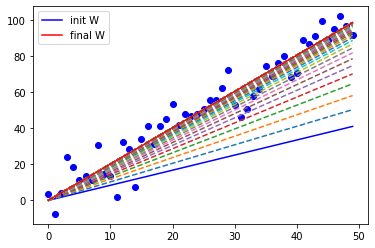

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

m = 50
# 데이터 준비
X = tf.constant(range(m), tf.float32)
y = X*2 + tf.random.normal((m,)) * 10
print(X.shape, y.shape)
plt.plot(X, y, 'bo')

# 학습 과정 - 1. W 값 초기화
W = tf.Variable(tf.random.normal(()))
plt.plot(X, W*X, 'b', label='init W')

# 2. lr 값 설정 (hyper-parameter)
lr = 0.0001  # learning rate

# 3. 학습 횟수 설정 (Epoch = 100)
for i in range(100):
    # 4. 자동 미분을 위한 객체 생성
    with tf.GradientTape() as tape:
        h = W * X   # 5. 출력 값 구하기
        cost = tf.keras.losses.MSE(y, h)  # 6. loss function - 오차값 구하기
    dw = tape.gradient(cost, W)  # 7. cost, W를 사용하여 미분 값 구하기
    W.assign(W - lr*dw)  # 8. 미분값과 learning rate의 곱을 사용하여 W 값 갱신 
    plt.plot(X, W*X, '--')   
    
    if not i % 20 :
        print(f'{i}, cost:{cost.numpy():.3f}, W:{W.numpy():.3f}')

plt.plot(X, W*X, 'r-', label='final W')
plt.legend()
plt.show()

### 3-02. MLP -XOR 게이트, keras

In [ ]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

# 변수 생성
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

'''
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
'''

model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=5000, verbose=0)
model.evaluate(X, y)
model.predict(X)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 113ms/step - loss: 0.0137 - binary_accuracy: 1.0000


array([[0.1284399 ],
       [0.8932273 ],
       [0.87179345],
       [0.10289845]], dtype=float32)

### 3-03. 보스톤 주택 - keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np


tf.random.set_seed(0)
np.random.seed(0)
boston = boston_housing.load_data()

(X_train, y_train), (X_test, y_test) = boston
print(X_train.shape, X_test.shape)


57344/57026 [==============================] - 0s 0us/step
(404, 13) (102, 13)


In [ ]:
print(type(boston), len(boston), type(boston[0]), len(boston[0]))

<class 'tuple'> 2 <class 'tuple'> 2


In [ ]:
# X 데이터에 대해서만 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(X_train.shape[1],), 
                       kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu', 
                       kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dense(1) )
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train ,epochs=50, batch_size=50, validation_split=0.2)
print("Train eval:", model.evaluate(X_train, y_train, batch_size=y_train.shape[0]))
print("Test  eval:", model.evaluate(X_test, y_test, batch_size=y_test.shape[0]))

Epoch 1/50
7/7 [==============================] - 1s 30ms/step - loss: 566.9521 - mae: 21.9321 - val_loss: 617.3007 - val_mae: 23.0348
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 535.4629 - mae: 21.1567 - val_loss: 583.7407 - val_mae: 22.2868
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 501.1243 - mae: 20.3477 - val_loss: 547.7255 - val_mae: 21.4566
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 465.8719 - mae: 19.4791 - val_loss: 506.0410 - val_mae: 20.4734
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 423.1851 - mae: 18.3637 - val_loss: 457.4452 - val_mae: 19.3116
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 378.5412 - mae: 17.1707 - val_loss: 401.6810 - val_mae: 17.8806
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 318.8985 - mae: 15.5110 - val_loss: 338.5996 - val_mae: 16.1417
Epoch 8/50
7/7 [==============================] - 0s 6ms/step

In [ ]:
from sklearn.metrics import r2_score

print("Train R2:", r2_score(y_train, model.predict(X_train)))
print("Test R2:", r2_score(y_test, model.predict(X_test)))

model.predict(X_test).shape

Train R2: 0.8413755906997207
Test R2: 0.7268526748842838


(102, 1)

- $\alpha$ aplha
- $\beta$ beta
- $\gamma$ gamma
- $\delta$ delta
- $\epsilon$ epsilon
- $\zeta$ zeta
- $\eta$ eta
- $\theta$ theta
- $\kappa$ kappa
- $\lambda$ lambda
- $\mu$ mu
- $\nu$ nu
- $\xi$ xi
- $\pi$ pi
- $\rho$ rho
- $\tau$ tau
- $\phi$ phi
- $\chi$ chi
- $\psi$ psi
- $\omega$ omega
- $2^2$
- $L_1$
- $sum$

